# Developer Salaries - Norway 2024

## Imports

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

## Data Load

In [2]:
df = pd.read_csv("data/salaries.csv")
df.head()

,kjønn,utdanning,erfaring,arbeidssted,arbeidssituasjon,fag,lønn,bonus?
0,mann,4,7,Agder,"in-house, privat sektor",AI / maskinlæring,865000,Nei
1,mann,5,2,Nordland,"in-house, offentlig/kommunal sektor",AI / maskinlæring,756000,Nei
2,mann,4,30,Oslo,konsulent,AI / maskinlæring,1500000,Nei
3,mann,5,25,Oslo,konsulent,AI / maskinlæring,1200000,Nei
4,mann,9,18,Oslo,"in-house, privat sektor",AI / maskinlæring,1200000,Nei


## EDA

In [3]:
df.shape

(2682, 8)

In [4]:
df.isnull().sum()

kjønn               0
utdanning           0
erfaring            0
arbeidssted         0
arbeidssituasjon    0
fag                 0
lønn                0
bonus?              0
dtype: int64

In [5]:
df["kjønn"].unique()

array(['mann', 'kvinne', 'annet / ønsker ikke oppgi'], dtype=object)

In [6]:
df["utdanning"].unique()

array([ 4,  5,  9,  2,  6,  0, 17, 18,  1,  3,  8,  7, 14, 20, 16, 10, 15,
       13, 12, 11, 19])

In [7]:
df["erfaring"].unique()

array([ 7,  2, 30, 25, 18, 14,  9,  5,  4,  3,  0,  1, 23, 28,  8, 10, 27,
       24, 22, 20, 19, 17, 16,  6, 15, 13, 12, 11, 21, 34, 44, 32, 31, 29,
       26, 39, 36, 40, 35, 38, 33, 43])

In [8]:
df["arbeidssted"].unique()

array(['Agder', 'Nordland', 'Oslo', 'Rogaland', 'Troms og Finnmark',
       'Trøndelag', 'Vestland', 'Viken', 'Innlandet', 'utlandet',
       'Vestfold og Telemark', 'Møre og Romsdal'], dtype=object)

In [9]:
df["arbeidssituasjon"].unique()

array(['in-house, privat sektor', 'in-house, offentlig/kommunal sektor',
       'konsulent', 'frilans / selvstendig næringsdrivende'], dtype=object)

In [10]:
df["fag"].unique()

array(['AI / maskinlæring', 'annet', 'app', 'arkitektur',
       'automatisering', 'backend', 'data science', 'databaser',
       'devops / drift', 'embedded / IOT / maskinvare', 'frontend',
       'fullstack', 'ledelse/administrativt', 'programvare', 'sikkerhet',
       'testing', 'UX / design'], dtype=object)

In [11]:
df["lønn"].unique()

array([ 865000,  756000, 1500000, 1200000,  839000,  980000,  750000,
        910000,  820000,  850000,  730000,  710000,  894000,  732000,
        900000,  640000, 1152000,  810000,  797000,  650000,  595000,
        525000, 1950000,  660000,  460000,  550000,  780000, 1800000,
        920000, 1326000, 1370000, 1170000, 1300000, 1100000, 1210000,
        700000, 1025000, 1000000,  870000,  560000,  590000,  685000,
        715000,  800000, 2400000,  570000,  630000,  740000,  930000,
        580000,  515000,  925000, 1014000, 1150000,  950000,  485000,
        960000, 1650000,  840000,  310000,  683000,  600000,  735000,
        940000, 1135000,  969000,  970000, 1115000, 1090000,  840099,
       1050000, 1015000,  930318,  690000,  758000,  835000,  875000,
       1750000,  770000,  625000,  510000,  680000,  903000,  765000,
        726000,  774201,  887000,  720000,  890000,  860000,  880000,
        556000,  775000, 1250000, 1265000, 1400000, 1005000, 1360000,
       1138300, 1230

In [12]:
df["bonus?"].unique()

array(['Nei', 'Ja'], dtype=object)

In [13]:
df.describe(include="all")

,kjønn,utdanning,erfaring,arbeidssted,arbeidssituasjon,fag,lønn,bonus?
count,2682,2682.000000,2682.000000,2682,2682,2682,2.682000e+03,2682
unique,3,NaN,NaN,12,4,17,NaN,2
top,mann,NaN,NaN,Oslo,"in-house, privat sektor",fullstack,NaN,Nei
freq,2295,NaN,NaN,1477,1192,893,NaN,1816
mean,NaN,4.127517,8.568606,NaN,NaN,NaN,8.980438e+05,NaN
std,NaN,2.842134,7.770099,NaN,NaN,NaN,2.882830e+05,NaN
min,NaN,0.000000,0.000000,NaN,NaN,NaN,3.000000e+05,NaN
25%,NaN,3.000000,3.000000,NaN,NaN,NaN,7.000000e+05,NaN
50%,NaN,3.000000,6.000000,NaN,NaN,NaN,8.500000e+05,NaN
75%,NaN,5.000000,13.000000,NaN,NaN,NaN,1.020000e+06,NaN


## Regression on Salary (lønn)

In [14]:
label_encoder = LabelEncoder()
df["kjønn_encoder"] = label_encoder.fit_transform(df["kjønn"])
df["arbeidssted_encoder"] = label_encoder.fit_transform(df["arbeidssted"])
df["arbeidssituasjon_encoder"] = label_encoder.fit_transform(df["arbeidssituasjon"])
df["fag_encoder"] = label_encoder.fit_transform(df["fag"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   kjønn                     2682 non-null   object
 1   utdanning                 2682 non-null   int64 
 2   erfaring                  2682 non-null   int64 
 3   arbeidssted               2682 non-null   object
 4   arbeidssituasjon          2682 non-null   object
 5   fag                       2682 non-null   object
 6   lønn                      2682 non-null   int64 
 7   bonus?                    2682 non-null   object
 8   kjønn_encoder             2682 non-null   int64 
 9   arbeidssted_encoder       2682 non-null   int64 
 10  arbeidssituasjon_encoder  2682 non-null   int64 
 11  fag_encoder               2682 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 251.6+ KB


In [16]:
X = df[["kjønn_encoder","utdanning","erfaring","arbeidssted_encoder","arbeidssituasjon_encoder","fag_encoder"]]
Y = df["lønn"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
print(model.intercept_)

553994.9078908333


In [20]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
kjønn_encoder,55579.267747
utdanning,7234.242302
erfaring,19612.452162
arbeidssted_encoder,-546.740522
arbeidssituasjon_encoder,17220.385631
fag_encoder,1221.229201


In [21]:
predictions = model.predict(X_test)
predictions

array([ 963101.1427193 ,  883336.97196831,  792396.98191544,
        956373.08813045, 1363669.78353361,  848127.93890253,
       1126850.62521149,  750643.4794287 ,  865907.92745188,
        850218.21364688,  853302.96727618,  780130.74359931,
        660906.55885101,  920728.17305598, 1205642.06993659,
        907884.73280273, 1135093.34143088,  816019.36778428,
        913233.80480593,  862918.72852914,  858468.58070433,
        804887.16331938, 1157904.72446379,  743657.74030122,
        877984.34552482, 1259151.44958147, 1047825.43703033,
        979007.16624801, 1120869.80556091,  820467.32738558,
        856188.48571678, 1055366.70015258,  822107.54895015,
        785066.0522715 ,  885825.72584151,  865907.92745188,
        891530.36938023,  761397.88456152,  827344.64940944,
        984244.2667073 ,  998277.98233408,  846295.47528965,
        770255.93159094,  824290.95659596,  763813.37854469,
        790058.84422007,  908462.53414007,  889238.01352599,
        786895.60166778,

<Axes: xlabel='lønn'>

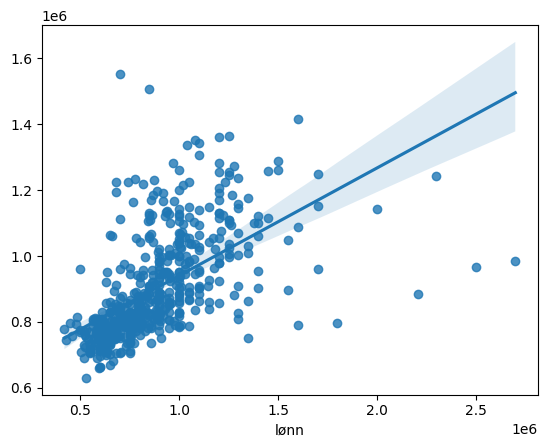

In [22]:
sns.regplot(x=y_test,y=predictions)